# Data Modelling

In [124]:
#importing required libraries
from sklearn import preprocessing
from sklearn.preprocessing import normalize
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import scikitplot as skplt
from matplotlib.colors import ListedColormap

In [125]:
#Loading DataSet
df = pd.read_csv('heart_pred_data.csv')
print("----------------------------------Data------------------------------------")
print(df)

----------------------------------Data------------------------------------
      age  height  weight  chest_pain   bp  fbs  chol  risk
0      67     141      35           1  185   84   333     1
1      73     164      46           1  231  123   208     1
2      59     158      86           1   93   61   194     0
3      59     154      54           1   98  187   265     1
4      36     186     103           0  186  131   325     1
...   ...     ...     ...         ...  ...  ...   ...   ...
9995   77     174      66           0  193  188   207     1
9996   47     182      86           1  220  134   245     1
9997   77     152      72           1  245   50   204     1
9998   75     170     107           0  239  137   160     1
9999   49     170      67           0  107   53   322     0

[10000 rows x 8 columns]


In [126]:
#splittng data for prediction
df1 = df.iloc[9000:,:]
df = df.iloc[:9000,:]

In [127]:
#data for prediction
test_XX = df1.iloc[:,:-1].values
#Actual Result data
actual_yy = df1.iloc[:,-1].values
actual_y = actual_yy.tolist()

In [128]:
#Value Counts
print("----------------------------------Value Counts------------------------------------")
print(df.risk.value_counts())

----------------------------------Value Counts------------------------------------
1    5555
0    3445
Name: risk, dtype: int64


In [129]:
#Description
print("----------------------------------------Data Description----------------------------------------")
print(df.describe())

----------------------------------------Data Description----------------------------------------
               age       height       weight   chest_pain           bp  \
count  9000.000000  9000.000000  9000.000000  9000.000000  9000.000000   
mean     56.035000   165.105333    72.091778     0.470333   165.106000   
std      16.982469    14.667255    22.202545     0.499147    54.042937   
min      20.000000   140.000000    35.000000     0.000000    75.000000   
25%      45.000000   152.000000    53.000000     0.000000   118.000000   
50%      57.000000   165.000000    72.000000     0.000000   164.000000   
75%      69.000000   178.000000    92.000000     1.000000   213.000000   
max      85.000000   190.000000   110.000000     1.000000   260.000000   

               fbs         chol         risk  
count  9000.000000  9000.000000  9000.000000  
mean    123.103778   242.058333     0.617222  
std      43.440135    59.374787     0.486092  
min      50.000000   150.000000     0.000000  
2

In [130]:
#Independent and dependent variables
X = df.iloc[:,:7]
Y = df.iloc[:,-1]

In [131]:
#Features
print("----------------------------------------Features----------------------------------------")
X_features = list(df.columns)
print("Features: ",X_features[:-1])
print("Dependent Variable: ",X_features[-1])

----------------------------------------Features----------------------------------------
Features:  ['age', 'height', 'weight', 'chest_pain', 'bp', 'fbs', 'chol']
Dependent Variable:  risk


In [132]:
#splitting data for testing and training
train_X, test_X, train_y, test_y = train_test_split(X,Y,test_size = 0.2,random_state = 65)

# Log Reg

In [133]:
from sklearn.linear_model import LogisticRegression

#model Initialisation, Training and Prediction
logit = LogisticRegression()
logit.fit( train_X, train_y)
pred_y0 = logit.predict(test_X)

#Model Characteristics
acc0 = metrics.accuracy_score(test_y, pred_y0)
prec0 = metrics.precision_score(test_y, pred_y0)
recall0 = metrics.recall_score(test_y, pred_y0)
f1sc0 = metrics.f1_score(test_y, pred_y0)
kappa0 = metrics.cohen_kappa_score(test_y, pred_y0)

#Probability Estimation, ROC AUC score
y_pred_proba0 = logit.predict_proba(test_X)[:,1]
fpr0, tpr0, _ = metrics.roc_curve( test_y,  y_pred_proba0)
auc0 = metrics.roc_auc_score( test_y, y_pred_proba0)

# MLP

In [134]:
from sklearn.neural_network import MLPClassifier

#model Initialisation, Training and Prediction
mlp = MLPClassifier()
mlp.fit( train_X, train_y)
pred_y1 = mlp.predict(test_X)

#Model Characteristics
acc1 = metrics.accuracy_score(test_y, pred_y1)
prec1 = metrics.precision_score(test_y, pred_y1)
recall1 = metrics.recall_score(test_y, pred_y1)
f1sc1 = metrics.f1_score(test_y, pred_y1)
kappa1 = metrics.cohen_kappa_score(test_y, pred_y1)

#Probability Estimation, ROC AUC score
y_pred_proba1 = mlp.predict_proba(test_X)[:,1]
fpr1, tpr1, _ = metrics.roc_curve( test_y,  y_pred_proba1)
auc1 = metrics.roc_auc_score( test_y, y_pred_proba1)

# SVM

In [135]:
from sklearn.svm import SVC

#model Initialisation, Training and Prediction
svcl = SVC(kernel='rbf',probability=True)
svcl.fit( train_X, train_y)
pred_y2 = svcl.predict(test_X)

#Model Characteristics
acc2 = metrics.accuracy_score(test_y, pred_y2)
prec2 = metrics.precision_score(test_y, pred_y2)
recall2 = metrics.recall_score(test_y, pred_y2)
f1sc2 = metrics.f1_score(test_y, pred_y2)
kappa2 = metrics.cohen_kappa_score(test_y, pred_y2)

#Probability Estimation, ROC AUC score
y_pred_proba2 = svcl.predict_proba(test_X)[:,1]
fpr2, tpr2, _ = metrics.roc_curve( test_y,  y_pred_proba2)
auc2 = metrics.roc_auc_score( test_y, y_pred_proba2)

# KNN

In [136]:
from sklearn.neighbors import KNeighborsClassifier

#model Initialisation, Training and Prediction
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit( train_X, train_y)
pred_y3 = knn.predict(test_X)

#Model Characteristics
acc3 = metrics.accuracy_score(test_y, pred_y3)
prec3 = metrics.precision_score(test_y, pred_y3)
recall3 = metrics.recall_score(test_y, pred_y3)
f1sc3 = metrics.f1_score(test_y, pred_y3)
kappa3 = metrics.cohen_kappa_score(test_y, pred_y3)

#Probability Estimation, ROC AUC score
y_pred_proba3 = knn.predict_proba(test_X)[:,1]
fpr3, tpr3, _ = metrics.roc_curve( test_y,  y_pred_proba3)
auc3 = metrics.roc_auc_score( test_y, y_pred_proba3)

# Random Forest

In [137]:
from sklearn.ensemble import RandomForestClassifier

#model Initialisation, Training and Prediction
rf = RandomForestClassifier(n_estimators=100)
rf.fit( train_X, train_y)
pred_y4 = rf.predict(test_X)

#Model Characteristics
acc4 = metrics.accuracy_score(test_y, pred_y4)
prec4 = metrics.precision_score(test_y, pred_y4)
recall4 = metrics.recall_score(test_y, pred_y4)
f1sc4 = metrics.f1_score(test_y, pred_y4)
kappa4 = metrics.cohen_kappa_score(test_y, pred_y4)

#Probability Estimation, ROC AUC score
y_pred_proba4 = rf.predict_proba(test_X)[:,1]
fpr4, tpr4, _ = metrics.roc_curve( test_y,  y_pred_proba4)
auc4 = metrics.roc_auc_score( test_y, y_pred_proba4)

# Ensemble-AdaBoost

In [138]:
from sklearn.ensemble import AdaBoostClassifier

#model Initialisation, Training and Prediction
ens = AdaBoostClassifier(n_estimators=100)
ens.fit( train_X, train_y)
pred_y5 = ens.predict(test_X)

#Model Characteristics
acc5 = metrics.accuracy_score(test_y, pred_y5)
prec5 = metrics.precision_score(test_y, pred_y5)
recall5 = metrics.recall_score(test_y, pred_y5)
f1sc5 = metrics.f1_score(test_y, pred_y5)
kappa5 = metrics.cohen_kappa_score(test_y, pred_y5)

#Probability Estimation, ROC AUC score
y_pred_proba5 = ens.predict_proba(test_X)[:,1]
fpr5, tpr5, _ = metrics.roc_curve( test_y,  y_pred_proba5)
auc5 = metrics.roc_auc_score( test_y, y_pred_proba5)

# Ensemble-Gradient Boosting

In [139]:
from sklearn.ensemble import GradientBoostingClassifier

#model Initialisation, Training and Prediction
ensgr = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
ensgr.fit( train_X, train_y)
pred_y6 = ensgr.predict(test_X)

#Model Characteristics
acc6 = metrics.accuracy_score(test_y, pred_y6)
prec6 = metrics.precision_score(test_y, pred_y6)
recall6 = metrics.recall_score(test_y, pred_y6)
f1sc6 = metrics.f1_score(test_y, pred_y6)
kappa6 = metrics.cohen_kappa_score(test_y, pred_y6)

#Probability Estimation, ROC AUC score
y_pred_proba6 = ensgr.predict_proba(test_X)[:,1]
fpr6, tpr6, _ = metrics.roc_curve( test_y,  y_pred_proba6)
auc6 = metrics.roc_auc_score( test_y, y_pred_proba6)

# Features

In [140]:
col = df.columns.tolist()[:-1]
categ_col = []
contin_col = []
for n in col:
    df_col = list(set(df[n].tolist()))
    if len(df_col) < 10:
        categ_col.append(n)
    else:
        contin_col.append(n)
print("Categorical Features: ",categ_col)
print("Continues Features: ",contin_col) 

Categorical Features:  ['chest_pain']
Continues Features:  ['age', 'height', 'weight', 'bp', 'fbs', 'chol']


# Distribution of Numerical Features

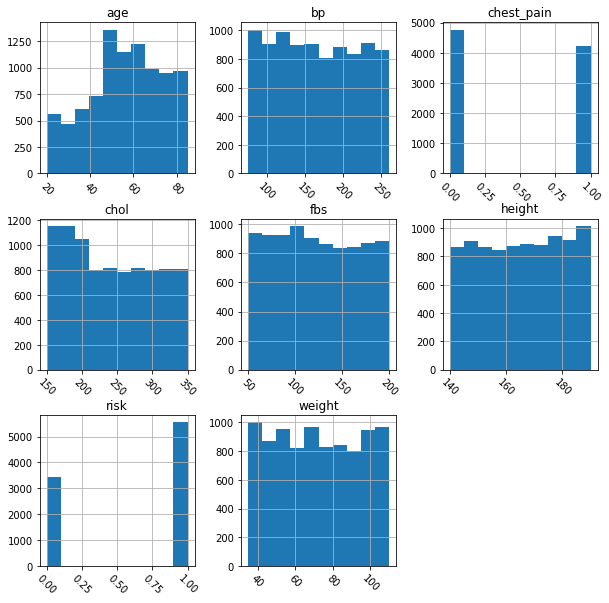

In [141]:
df.hist(figsize=(10,10), xrot=-45, bins=10)
plt.show()

# ROC Curve Comparison

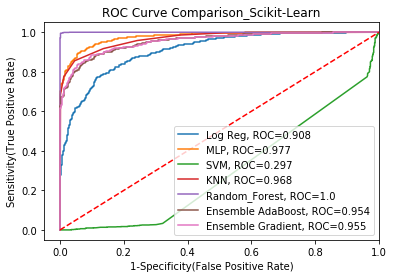

In [142]:
plt.plot(fpr0,tpr0,label="Log Reg, ROC="+str(round(auc0,3)))
plt.plot(fpr1,tpr1,label="MLP, ROC="+str(round(auc1,3)))
plt.plot(fpr2,tpr2,label="SVM, ROC="+str(round(auc2,3))) 
plt.plot(fpr3,tpr3,label="KNN, ROC="+str(round(auc3,3)))
plt.plot(fpr4,tpr4,label="Random_Forest, ROC="+str(round(auc4,3)))
plt.plot(fpr5,tpr5,label="Ensemble AdaBoost, ROC="+str(round(auc5,3)))
plt.plot(fpr6,tpr6,label="Ensemble Gradient, ROC="+str(round(auc6,3)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('ROC Curve Comparison_Scikit-Learn')
plt.legend(loc="lower right")
plt.show() 

# Accuracy Score Comparison

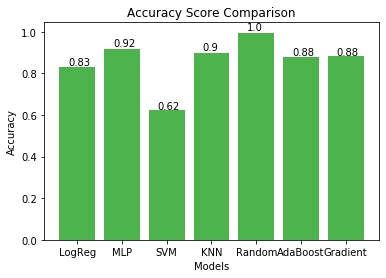

In [143]:
xval0 = np.arange(7)
yval0 = [acc0,acc1,acc2,acc3,acc4,acc5,acc6]
yval10 = [round(x,2) for x in yval0]
xname = ['LogReg','MLP','SVM','KNN','Random','AdaBoost','Gradient']

plt.bar(xval0,yval0,color=(0.3, 0.7, 0.3))
plt.xticks(xval0,xname)
plt.xlabel('Models')
plt.ylabel('Accuracy')
for i, top_label in enumerate(yval10):
    plt.text(xval0[i] - 0.20, top_label + 0.01, str(top_label))
plt.title('Accuracy Score Comparison')
plt.show()

# Precision Score Comparison

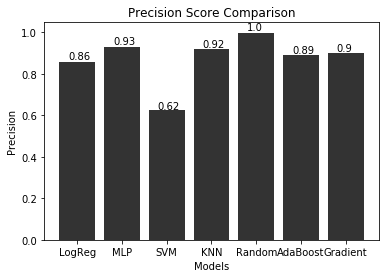

In [144]:
xval1 = np.arange(7)
yval1 = [prec0,prec1,prec2,prec3,prec4,prec5,prec6]
yval11 = [round(x,2) for x in yval1]
xname = ['LogReg','MLP','SVM','KNN','Random','AdaBoost','Gradient']

plt.bar(xval1,yval1,color=(0.2, 0.2, 0.2))
plt.xticks(xval1,xname)
plt.xlabel('Models')
plt.ylabel('Precision')
for i, top_label in enumerate(yval11):
    plt.text(xval1[i] - 0.20, top_label + 0.01, str(top_label))
plt.title('Precision Score Comparison')
plt.show()

# Recall Comparison

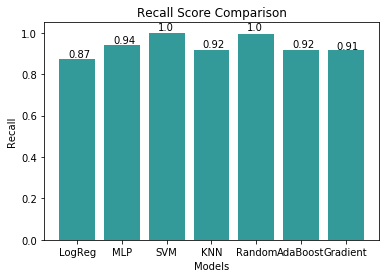

In [145]:
xval2 = np.arange(7)
yval2 = [recall0,recall1,recall2,recall3,recall4,recall5,recall6]
yval12 = [round(x,2) for x in yval2]
xname = ['LogReg','MLP','SVM','KNN','Random','AdaBoost','Gradient']

plt.bar(xval2,yval2,color=(0.2, 0.6, 0.6))
plt.xticks(xval2,xname)
plt.xlabel('Models')
plt.ylabel('Recall')
for i, top_label in enumerate(yval12):
    plt.text(xval2[i] - 0.20, top_label + 0.01, str(top_label))
plt.title('Recall Score Comparison')
plt.show()

# F1-Score Comparison

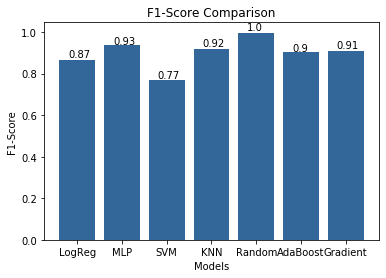

In [146]:
xval3 = np.arange(7)
yval3 = [f1sc0,f1sc1,f1sc2,f1sc3,f1sc4,f1sc5,f1sc6]
yval13 = [round(x,2) for x in yval3]
xname = ['LogReg','MLP','SVM','KNN','Random','AdaBoost','Gradient']

plt.bar(xval3,yval3,color=(0.2, 0.4, 0.6))
plt.xticks(xval3,xname)
plt.xlabel('Models')
plt.ylabel('F1-Score')
for i, top_label in enumerate(yval13):
    plt.text(xval3[i] - 0.20, top_label + 0.01, str(top_label))
plt.title('F1-Score Comparison')
plt.show()

# Kappa Statistics Comparison

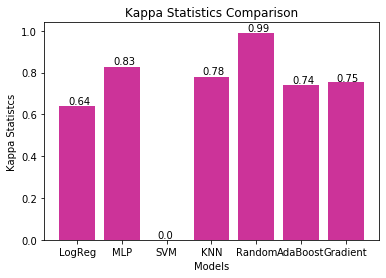

In [147]:
xval4 = np.arange(7)
yval4 = [kappa0,kappa1,kappa2,kappa3,kappa4,kappa5,kappa6]
yval14 = [round(x,2) for x in yval4]
xname = ['LogReg','MLP','SVM','KNN','Random','AdaBoost','Gradient']

plt.bar(xval4,yval4,color=(0.8, 0.2, 0.6))
plt.xticks(xval4,xname)
plt.xlabel('Models')
plt.ylabel('Kappa Statistcs')
for i, top_label in enumerate(yval14):
    plt.text(xval4[i] - 0.20, top_label + 0.01, str(top_label))
plt.title('Kappa Statistics Comparison')
plt.show()

# Classification Report

In [148]:
pred_all = [pred_y0, pred_y1, pred_y2, pred_y3, pred_y4, pred_y5, pred_y6]
name_all = ['LogReg','MLP','SVM','KNN','Random','AdaBoost','Gradient']
acc_all = []
prec_all = []
recall_all = []
f1score_all = []
kappa_all = []

for i in range(7):
    acc_all.append(round(metrics.accuracy_score(test_y, pred_all[i]),3))
    prec_all.append(round(metrics.precision_score(test_y, pred_all[i]),3))
    recall_all.append(round(metrics.recall_score(test_y, pred_all[i]),3))
    f1score_all.append(round(metrics.f1_score(test_y, pred_all[i]),3))
    kappa_all.append(round(metrics.cohen_kappa_score(test_y, pred_all[i]),3))

df_class_report = pd.DataFrame({"Model":name_all,"Accuracy":acc_all,"Precision":prec_all,"Recall":recall_all,"F1-Score":f1score_all,"Kappa-Stat":kappa_all})
print("---------------Classification Report Comparison---------------\n")
print(df_class_report)

---------------Classification Report Comparison---------------

      Model  Accuracy  Precision  Recall  F1-Score  Kappa-Stat
0    LogReg     0.831      0.858   0.874     0.866       0.638
1       MLP     0.918      0.929   0.941     0.935       0.825
2       SVM     0.624      0.624   1.000     0.768       0.000
3       KNN     0.897      0.918   0.917     0.918       0.781
4    Random     0.996      0.997   0.996     0.996       0.991
5  AdaBoost     0.879      0.891   0.918     0.904       0.739
6  Gradient     0.884      0.902   0.915     0.908       0.753


# Correlation

In [149]:
# size=10
corr = df.corr()
corr

,age,height,weight,chest_pain,bp,fbs,chol,risk
age,1.000000,0.027508,-0.017230,-0.003424,0.009186,-0.011798,0.035971,0.164814
height,0.027508,1.000000,-0.013926,-0.017302,-0.015414,-0.009118,0.024080,-0.057702
weight,-0.017230,-0.013926,1.000000,0.016279,0.031407,0.004163,-0.024147,0.136007
chest_pain,-0.003424,-0.017302,0.016279,1.000000,0.029892,0.003017,-0.020000,0.173258
bp,0.009186,-0.015414,0.031407,0.029892,1.000000,-0.007615,-0.030259,0.172089
fbs,-0.011798,-0.009118,0.004163,0.003017,-0.007615,1.000000,0.037449,0.166315
chol,0.035971,0.024080,-0.024147,-0.020000,-0.030259,0.037449,1.000000,0.531318
risk,0.164814,-0.057702,0.136007,0.173258,0.172089,0.166315,0.531318,1.000000


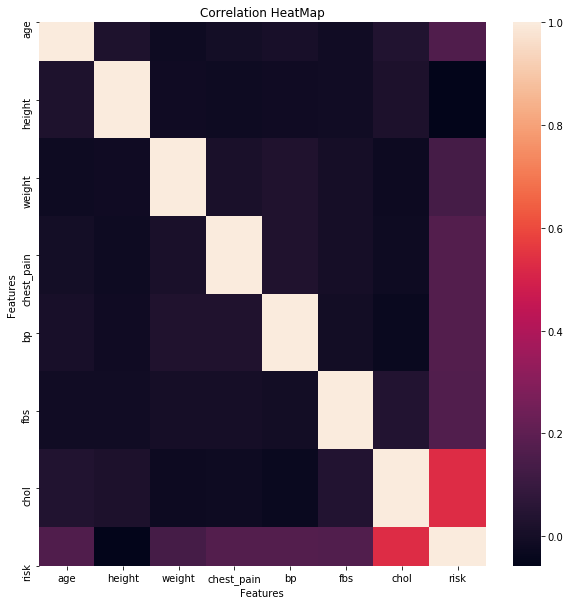

In [150]:
plt.figure(figsize=(10,10))
plt.title("Correlation HeatMap")
sns.heatmap(corr)
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

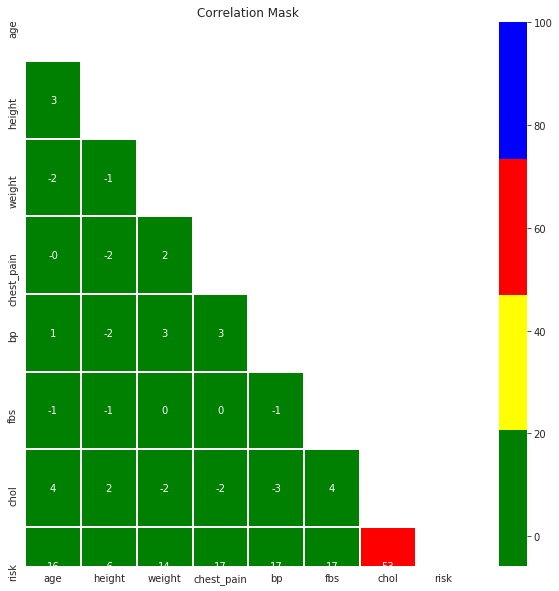

In [151]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(corr*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))
plt.title("Correlation Mask")
plt.show()

In [152]:
column_1 = df["risk"]
column_2 = df["age"]
correlation1 = column_1.corr(column_2)
print("correlation between age and risk  =",correlation1)

correlation between age and risk  = 0.1648143003464603


In [153]:
column_1 = df["risk"]
column_2 = df["height"]
correlation2 = column_1.corr(column_2)
print("correlation between height and risk  =",correlation2)

correlation between height and risk  = -0.057701874395394835


In [154]:
column_1 = df["risk"]
column_2 = df["weight"]
correlation3 = column_1.corr(column_2)
print("correlation between weight and risk  =",correlation3)

correlation between weight and risk  = 0.13600672893627266


In [155]:
column_1 = df["risk"]
column_2 = df["chest_pain"]
correlation4 = column_1.corr(column_2)
print("correlation between chest pain and risk  =",correlation4)

correlation between chest pain and risk  = 0.17325811393129942


In [156]:
column_1 = df["risk"]
column_2 = df["bp"]
correlation5 = column_1.corr(column_2)
print("correlation between blood pressure and risk  =",correlation5)

correlation between blood pressure and risk  = 0.17208881735453577


In [157]:
column_1 = df["risk"]
column_2 = df["fbs"]
correlation6 = column_1.corr(column_2)
print("correlation between blood sugar and risk  =",correlation6)

correlation between blood sugar and risk  = 0.16631510582450143


In [158]:
column_1 = df["risk"]
column_2 = df["chol"]
correlation7 = column_1.corr(column_2)
print("correlation between cholesterol and risk  =",correlation7)

correlation between cholesterol and risk  = 0.531318496502771


# Box Plot

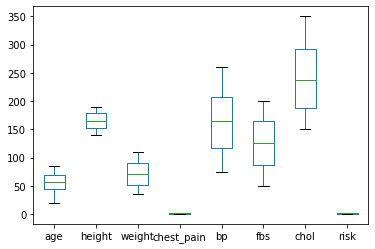

In [159]:
df1.plot(kind='box')
plt.show()

----------Box Plot between Age and Risk----------


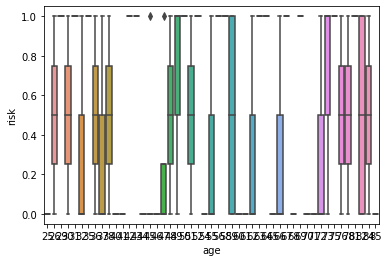

In [169]:
print('----------Box Plot between Age and Risk----------')
ax = sns.boxplot(x='age', y="risk", data=df.iloc[:100,:])

----------Box Plot between Height and Risk----------


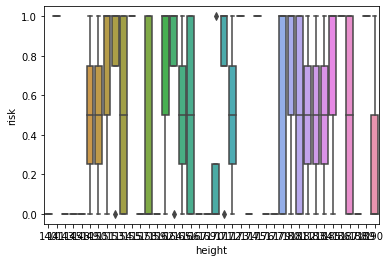

In [170]:
print('----------Box Plot between Height and Risk----------')
ax = sns.boxplot(x='height', y="risk", data=df.iloc[:100,:])

----------Box Plot between Weight and Risk----------


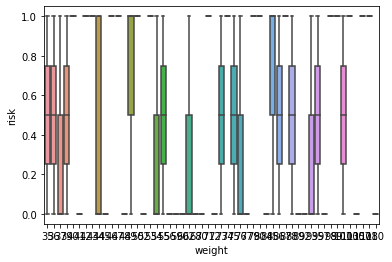

In [172]:
print('----------Box Plot between Weight and Risk----------')
ax = sns.boxplot(x='weight', y="risk", data=df.iloc[:100,:])

----------Box Plot between Chest Pain and Risk----------


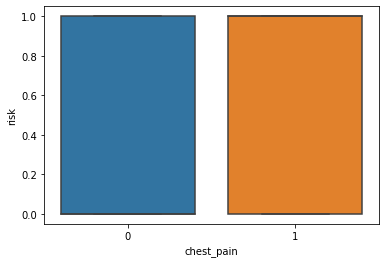

In [173]:
print('----------Box Plot between Chest Pain and Risk----------')
ax = sns.boxplot(x='chest_pain', y="risk", data=df.iloc[:100,:])

----------Box Plot between BP and Risk----------


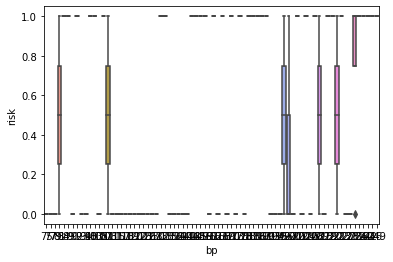

In [174]:
print('----------Box Plot between BP and Risk----------')
ax = sns.boxplot(x='bp', y="risk", data=df.iloc[:100,:])

----------Box Plot between FBS and Risk----------


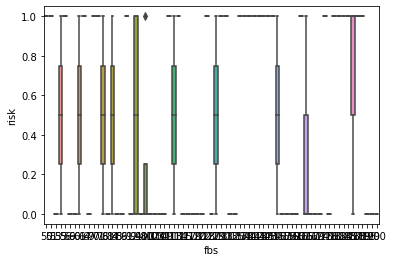

In [175]:
print('----------Box Plot between FBS and Risk----------')
ax = sns.boxplot(x='fbs', y="risk", data=df.iloc[:100,:])

----------Box Plot between Cholesterol and Risk----------


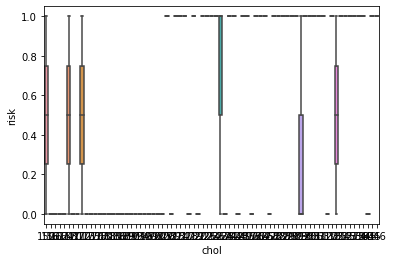

In [176]:
print('----------Box Plot between Cholesterol and Risk----------')
ax = sns.boxplot(x='chol', y="risk", data=df.iloc[:100,:])